<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_7iterations_100000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

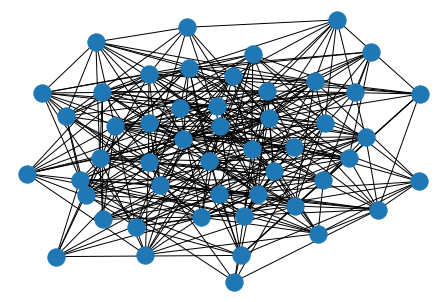

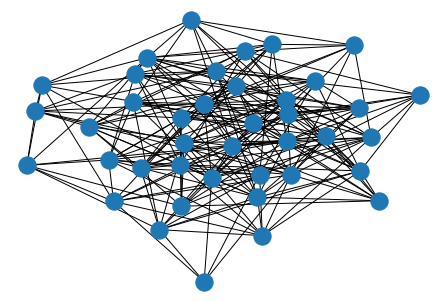

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 100000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
[[0 1 0 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:                       
                      PNN2 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      
                      PNN2 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39]
[1980, 3901, 7564, 14167, 24921, 40326, 58045, 71927, 81316, 84580, 81834, 72994, 58618, 41416, 25805, 14611, 7745, 3921, 2028, 1010, 495, 245, 133, 72, 39, 18, 7, 5, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3901, 7564, 14167, 24921, 40326, 58045, 73907, 85217, 92144, 96001, 97915, 98944, 99461, 99712, 99828, 99889, 99922, 99943, 99954, 99956, 99957, 99961]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39]]
[[], [1980, 3901, 7564, 14167, 24921, 40326, 58045, 71927, 81316, 84580, 81834, 72994, 58618, 41416, 25805, 14611, 7745, 3921, 2028, 1010, 495, 245, 133, 72, 39, 18, 7, 5, 4, 0]]
[[], [0, 0, 0, 0, 0, 0, 0, 1980, 3901, 7564, 14167, 24921, 40326, 58045, 73907, 85217, 92144, 96001, 97915, 98944, 99461, 99712, 99828, 99889,

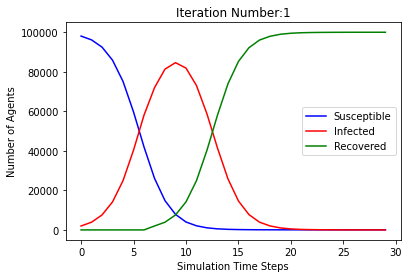

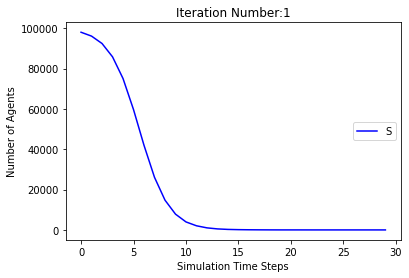

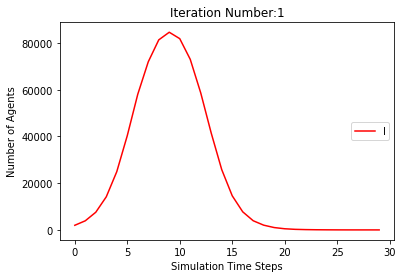

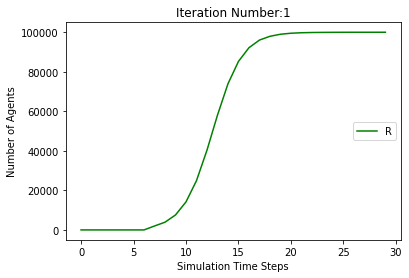

[98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32]
[1980, 3919, 7665, 14497, 25603, 41034, 58155, 71498, 80198, 83278, 80741, 72001, 57837, 41369, 26299, 15752, 8970, 4697, 2346, 1084, 436, 185, 97, 55, 33, 18, 13, 8, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3919, 7665, 14497, 25603, 41034, 58155, 73478, 84117, 90943, 95238, 97604, 98871, 99524, 99777, 99869, 99913, 99935, 99950, 99955, 99960, 99962, 99966, 99968]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32]]
[[], [1980, 3901, 7564, 14167, 24921, 40326, 58045, 71927, 81316, 84580, 81834, 72994, 58618, 41416, 25805, 14611, 7745, 3921, 2028, 1010, 495, 

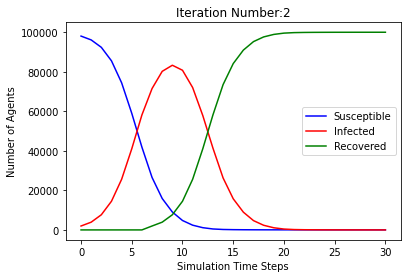

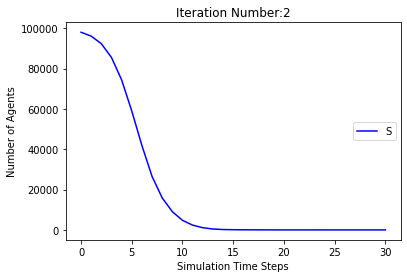

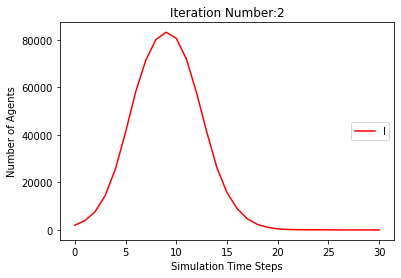

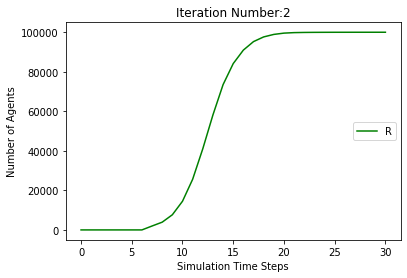

[98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71, 57, 47, 42, 40, 39, 39, 39, 39, 39, 39, 39, 39]
[1980, 3906, 7603, 14214, 25161, 40480, 58231, 72281, 81285, 84405, 81713, 72748, 58487, 41246, 25461, 14663, 7898, 4002, 2034, 986, 481, 238, 107, 55, 32, 18, 8, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3906, 7603, 14214, 25161, 40480, 58231, 74261, 85191, 92008, 95927, 97909, 98967, 99477, 99722, 99854, 99906, 99929, 99943, 99953, 99958, 99960, 99961]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71, 57, 47, 42, 40, 39, 39, 39, 39, 39, 39, 39, 39]]

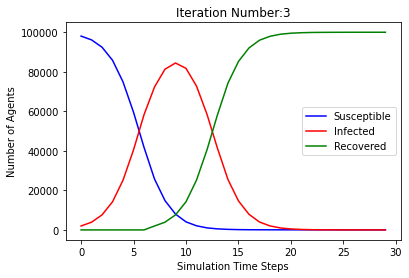

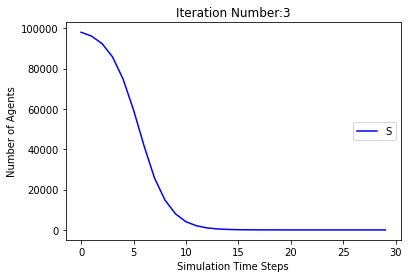

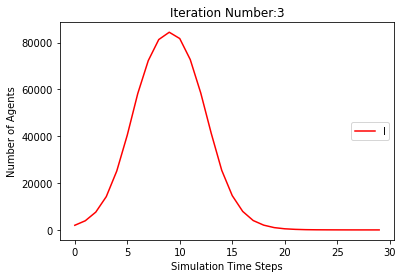

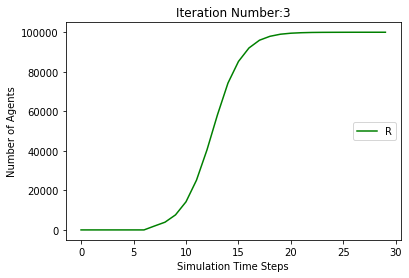

[98020, 96121, 92473, 85836, 74863, 59456, 41631, 26156, 15327, 8717, 4694, 2346, 1097, 501, 237, 128, 75, 57, 47, 41, 37, 32, 31, 30, 30, 30, 30, 30, 30, 30, 30]
[1980, 3879, 7527, 14164, 25137, 40544, 58369, 71864, 80794, 83756, 81142, 72517, 58359, 41130, 25919, 15199, 8642, 4637, 2299, 1056, 464, 205, 97, 45, 27, 17, 11, 7, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3879, 7527, 14164, 25137, 40544, 58369, 73844, 84673, 91283, 95306, 97654, 98903, 99499, 99763, 99872, 99925, 99943, 99953, 99959, 99963, 99968, 99969, 99970]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71, 57, 47, 42, 40, 39, 39, 39, 39, 3

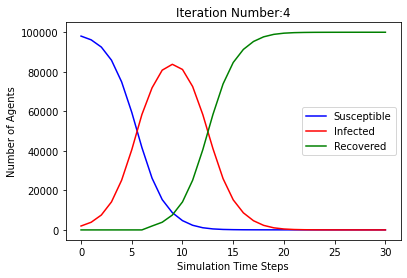

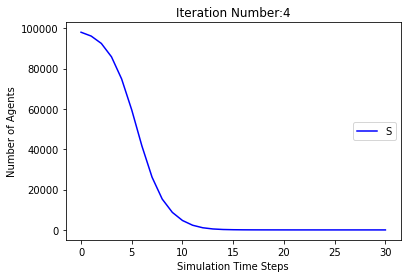

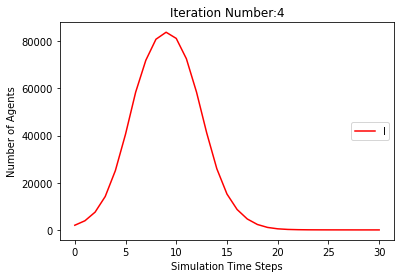

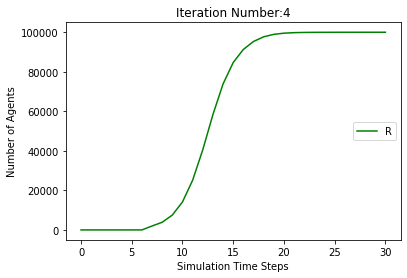

[98020, 96111, 92443, 85775, 75139, 60168, 42885, 27165, 15464, 8028, 3836, 1660, 686, 228, 86, 39, 25, 18, 17, 15, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[1980, 3889, 7557, 14225, 24861, 39832, 57115, 70855, 80647, 84415, 81939, 73479, 59482, 42657, 27079, 15425, 8003, 3818, 1643, 671, 215, 74, 27, 13, 6, 5, 4, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3889, 7557, 14225, 24861, 39832, 57115, 72835, 84536, 91972, 96164, 98340, 99314, 99772, 99914, 99961, 99975, 99982, 99983, 99985, 99987, 99988, 99988, 99988, 99988, 99988, 99989]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71,

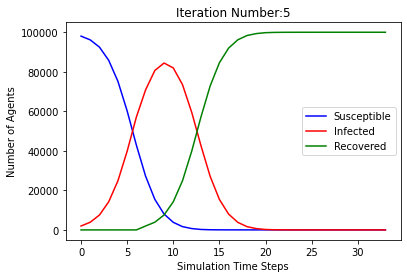

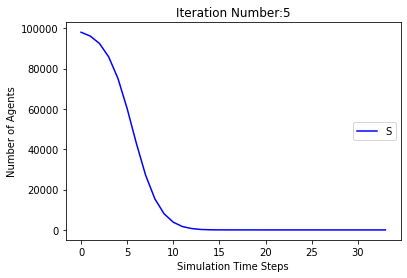

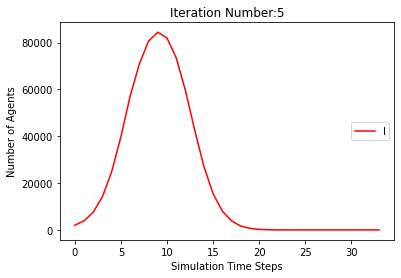

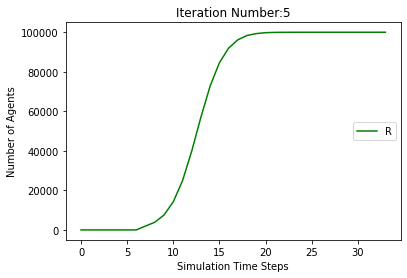

[98020, 96033, 92357, 85713, 74957, 59832, 42778, 27696, 17143, 10297, 6007, 3377, 1750, 858, 423, 244, 158, 125, 104, 99, 93, 89, 84, 83, 82, 82, 80, 80, 80, 80, 80, 80, 80, 80]
[1980, 3967, 7643, 14287, 25043, 40168, 57222, 70324, 78890, 82060, 79706, 71580, 58082, 41920, 27273, 16899, 10139, 5882, 3273, 1651, 765, 334, 160, 75, 43, 22, 19, 13, 9, 4, 3, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3967, 7643, 14287, 25043, 40168, 57222, 72304, 82857, 89703, 93993, 96623, 98250, 99142, 99577, 99756, 99842, 99875, 99896, 99901, 99907, 99911, 99916, 99917, 99918, 99918, 99920]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 27

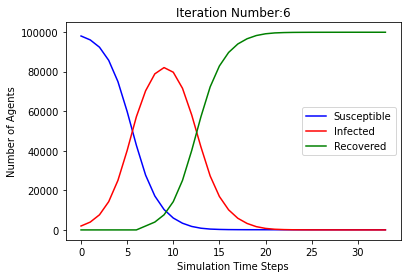

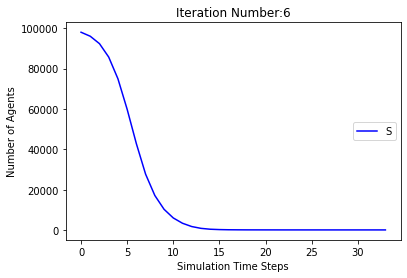

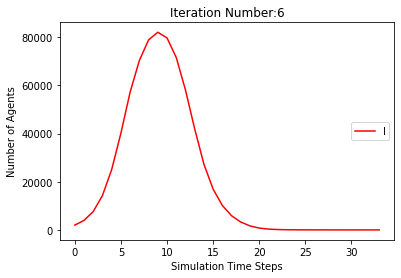

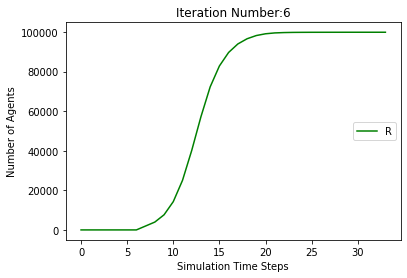

[98020, 96086, 92432, 85901, 75172, 60262, 43292, 28217, 17212, 9656, 5038, 2567, 1222, 581, 261, 122, 77, 58, 46, 37, 35, 34, 34, 34, 34, 34, 34, 34, 34]
[1980, 3914, 7568, 14099, 24828, 39738, 56708, 69803, 78874, 82776, 80863, 72605, 59040, 42711, 27956, 17090, 9579, 4980, 2521, 1185, 546, 227, 88, 43, 24, 12, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3914, 7568, 14099, 24828, 39738, 56708, 71783, 82788, 90344, 94962, 97433, 98778, 99419, 99739, 99878, 99923, 99942, 99954, 99963, 99965, 99966]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71, 57, 47, 42, 40, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96121

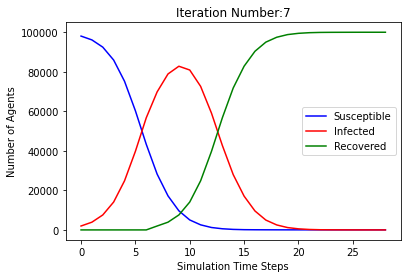

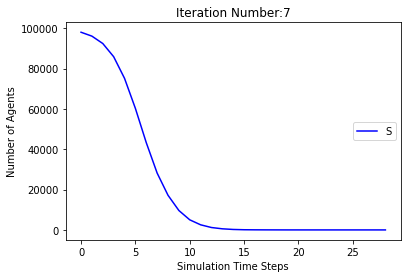

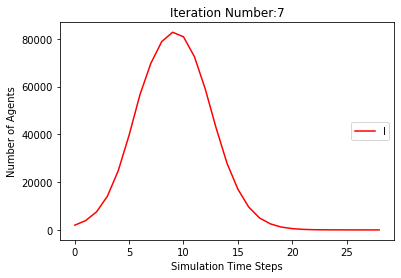

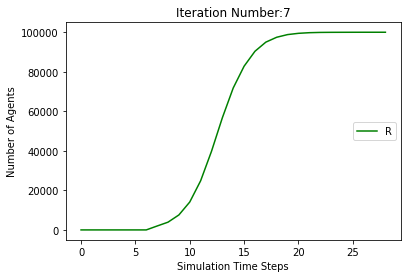

[98020, 96095, 92400, 85811, 74957, 59955, 42709, 27237, 16170, 8934, 4782, 2424, 1236, 598, 311, 174, 107, 84, 66, 55, 52, 44, 40, 36, 36, 36, 36, 36, 36, 36, 36]
[1980, 3905, 7600, 14189, 25043, 40045, 57291, 70783, 79925, 83466, 81029, 72533, 58719, 42111, 26926, 15996, 8827, 4698, 2358, 1181, 546, 267, 134, 71, 48, 30, 19, 16, 8, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3905, 7600, 14189, 25043, 40045, 57291, 72763, 83830, 91066, 95218, 97576, 98764, 99402, 99689, 99826, 99893, 99916, 99934, 99945, 99948, 99956, 99960, 99964]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71, 57, 47, 42, 40, 39, 39, 39, 39

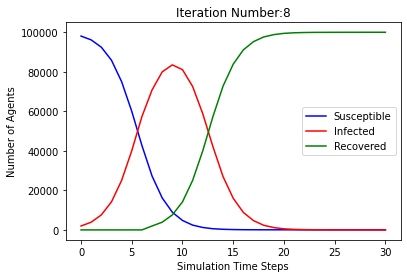

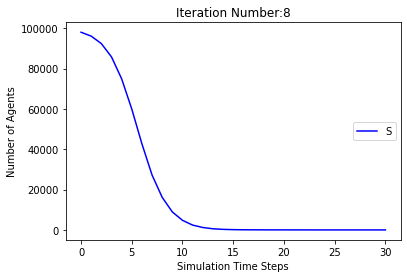

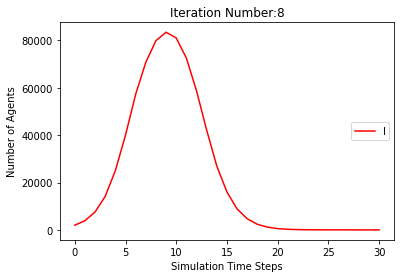

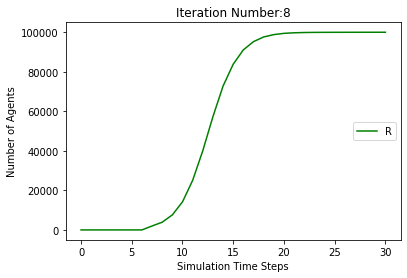

[98020, 96068, 92323, 85710, 74757, 59929, 43433, 29347, 19267, 12610, 7760, 4464, 2367, 1289, 724, 452, 311, 234, 198, 167, 145, 132, 127, 122, 119, 114, 113, 112, 111, 111, 111, 109, 109, 109, 109, 108, 108, 108, 108, 108, 108, 108, 108]
[1980, 3932, 7677, 14290, 25243, 40071, 56567, 68673, 76801, 79713, 77950, 70293, 57562, 42144, 28623, 18815, 12299, 7526, 4266, 2200, 1144, 592, 325, 189, 115, 84, 54, 33, 21, 16, 11, 10, 5, 4, 3, 3, 3, 3, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3932, 7677, 14290, 25243, 40071, 56567, 70653, 80733, 87390, 92240, 95536, 97633, 98711, 99276, 99548, 99689, 99766, 99802, 99833, 99855, 99868, 99873, 99878, 99881, 99886, 99887, 99888, 99889, 99889, 99889, 99891, 99891, 99891, 99891, 99892]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131

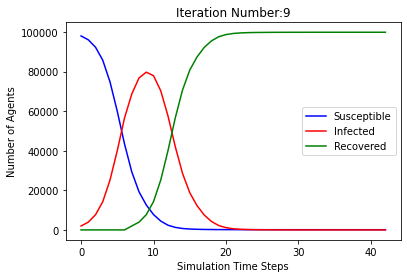

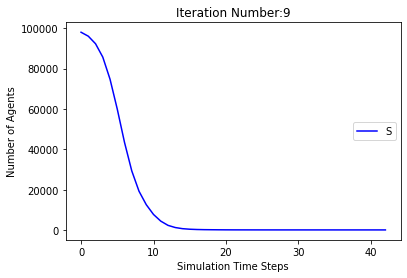

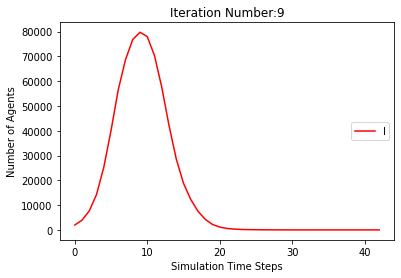

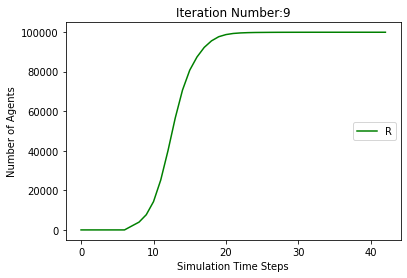

[98020, 96077, 92241, 85406, 74567, 59297, 41755, 26192, 15198, 8227, 4142, 1954, 910, 416, 190, 109, 69, 50, 43, 35, 28, 25, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22]
[1980, 3923, 7759, 14594, 25433, 40703, 58245, 71828, 80879, 84014, 81264, 72613, 58387, 41339, 26002, 15089, 8158, 4092, 1911, 875, 388, 165, 86, 46, 28, 21, 13, 6, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3923, 7759, 14594, 25433, 40703, 58245, 73808, 84802, 91773, 95858, 98046, 99090, 99584, 99810, 99891, 99931, 99950, 99957, 99965, 99972, 99975, 99977, 99977, 99978]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71, 57, 47, 42, 40, 39, 3

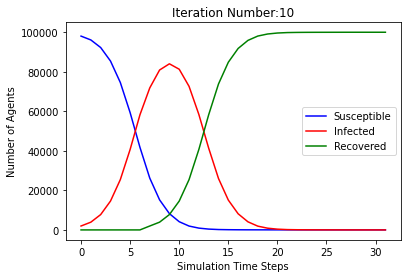

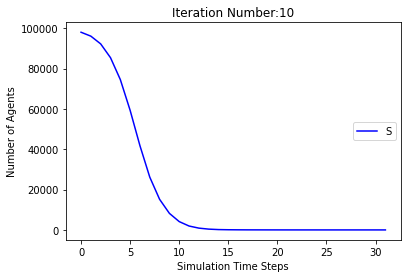

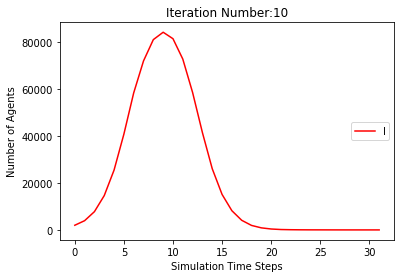

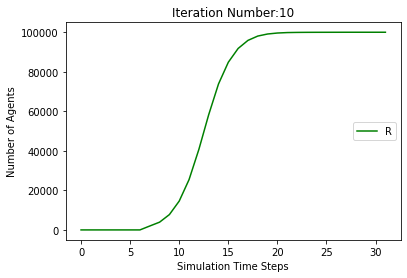

[98020, 96117, 92500, 86115, 75372, 60561, 43863, 29087, 18021, 10363, 5560, 2824, 1362, 662, 316, 184, 122, 94, 73, 62, 60, 58, 57, 57, 56, 56, 55, 55, 55, 55, 55, 55, 55, 55]
[1980, 3883, 7500, 13885, 24628, 39439, 56137, 68933, 78096, 82137, 80555, 72548, 59199, 43201, 28771, 17837, 10241, 5466, 2751, 1300, 602, 258, 127, 65, 38, 17, 7, 5, 3, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3883, 7500, 13885, 24628, 39439, 56137, 70913, 81979, 89637, 94440, 97176, 98638, 99338, 99684, 99816, 99878, 99906, 99927, 99938, 99940, 99942, 99943, 99943, 99944, 99944, 99945]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 1

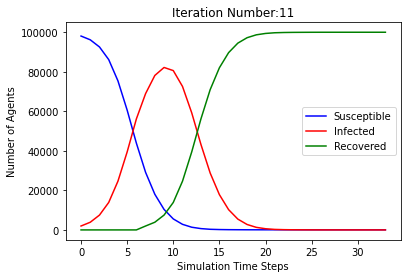

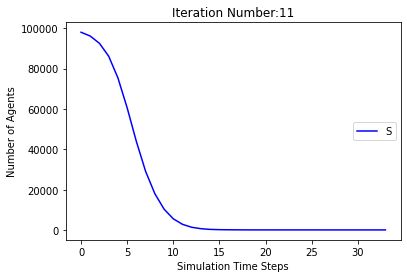

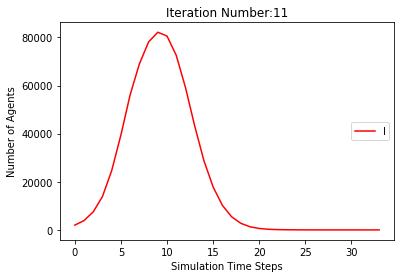

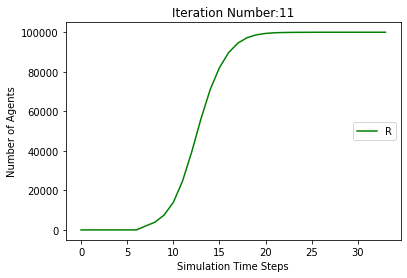

[98020, 96187, 92602, 86110, 75585, 60592, 42894, 26733, 15181, 7821, 3894, 1970, 975, 451, 208, 105, 72, 53, 44, 42, 42, 41, 41, 41, 41, 41, 41, 41, 41]
[1980, 3813, 7398, 13890, 24415, 39408, 57106, 71287, 81006, 84781, 82216, 73615, 59617, 42443, 26525, 15076, 7749, 3841, 1926, 933, 409, 167, 64, 31, 12, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3813, 7398, 13890, 24415, 39408, 57106, 73267, 84819, 92179, 96106, 98030, 99025, 99549, 99792, 99895, 99928, 99947, 99956, 99958, 99958, 99959]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71, 57, 47, 42, 40, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96121, 9

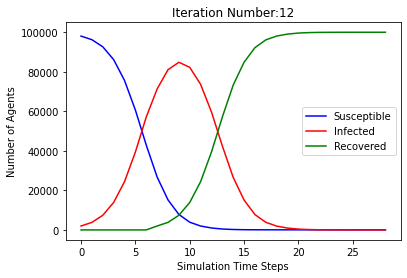

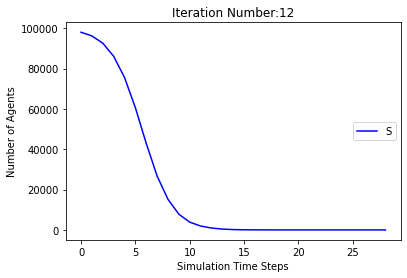

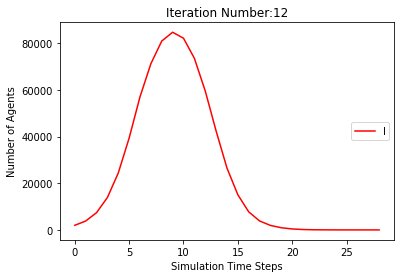

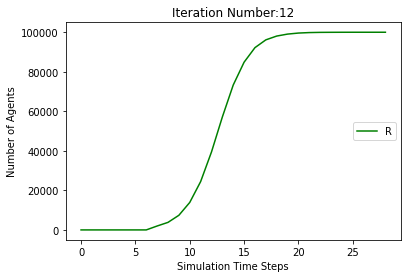

[98020, 96067, 92322, 85610, 74537, 58957, 41162, 25431, 14674, 8083, 4350, 2298, 1167, 603, 345, 222, 150, 109, 80, 69, 64, 59, 56, 54, 53, 52, 52, 52, 51, 51, 51, 51, 51, 51, 51, 51]
[1980, 3933, 7678, 14390, 25463, 41043, 58838, 72589, 81393, 84239, 81260, 72239, 57790, 40559, 25086, 14452, 7933, 4241, 2218, 1098, 539, 286, 166, 96, 56, 28, 17, 12, 8, 5, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3933, 7678, 14390, 25463, 41043, 58838, 74569, 85326, 91917, 95650, 97702, 98833, 99397, 99655, 99778, 99850, 99891, 99920, 99931, 99936, 99941, 99944, 99946, 99947, 99948, 99948, 99948, 99949]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 

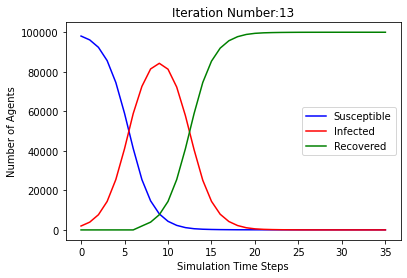

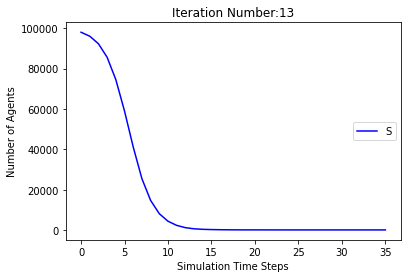

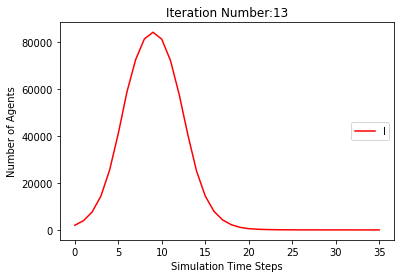

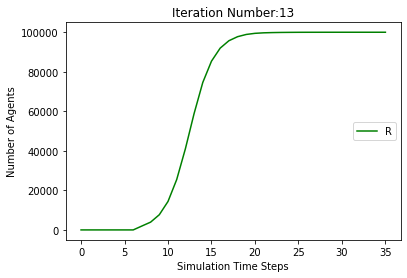

[98020, 96051, 92249, 85504, 74391, 58924, 40932, 24959, 14219, 7689, 4007, 2026, 1021, 508, 243, 152, 108, 82, 70, 59, 55, 48, 46, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44]
[1980, 3949, 7751, 14496, 25609, 41076, 59068, 73061, 81832, 84560, 81497, 72365, 57903, 40424, 24716, 14067, 7581, 3925, 1956, 962, 453, 195, 106, 63, 37, 25, 14, 10, 4, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3949, 7751, 14496, 25609, 41076, 59068, 75041, 85781, 92311, 95993, 97974, 98979, 99492, 99757, 99848, 99892, 99918, 99930, 99941, 99945, 99952, 99954, 99955, 99955, 99955, 99955, 99955, 99956]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 40

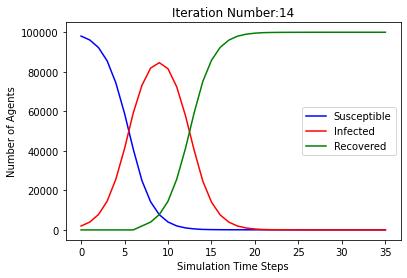

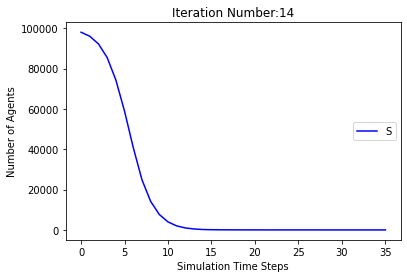

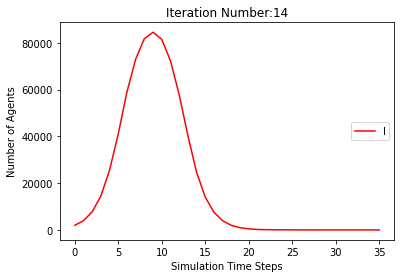

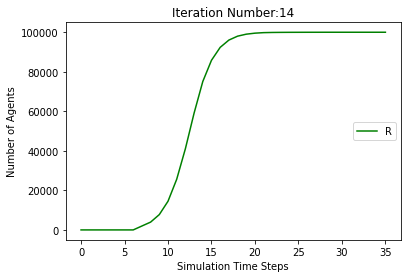

[98020, 96060, 92387, 85647, 74594, 58894, 41328, 25864, 15141, 8284, 4330, 2134, 1050, 516, 240, 119, 71, 51, 38, 33, 28, 27, 27, 27, 27, 27, 27, 27, 27]
[1980, 3940, 7613, 14353, 25406, 41106, 58672, 72156, 80919, 84103, 81317, 72460, 57844, 40812, 25624, 15022, 8213, 4279, 2096, 1017, 488, 213, 92, 44, 24, 11, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 3940, 7613, 14353, 25406, 41106, 58672, 74136, 84859, 91716, 95670, 97866, 98950, 99484, 99760, 99881, 99929, 99949, 99962, 99967, 99972, 99973]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71, 57, 47, 42, 40, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96121

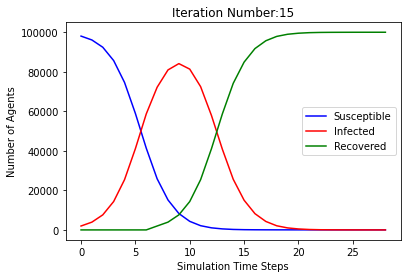

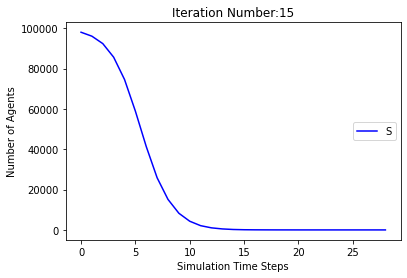

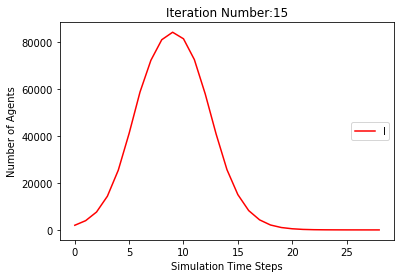

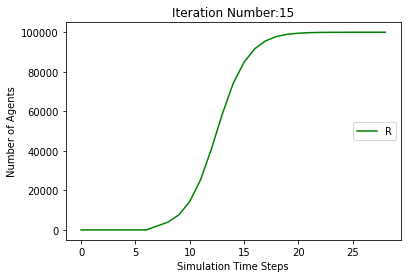

[98020, 95973, 92253, 85539, 74575, 59092, 41654, 26114, 15252, 8314, 4325, 2126, 1008, 495, 239, 132, 80, 65, 55, 50, 46, 43, 43, 43, 43, 43, 43, 43, 43]
[1980, 4027, 7747, 14461, 25425, 40908, 58346, 71906, 80721, 83939, 81214, 72449, 58084, 41159, 25875, 15120, 8234, 4260, 2071, 958, 449, 196, 89, 37, 22, 12, 7, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 1980, 4027, 7747, 14461, 25425, 40908, 58346, 73886, 84748, 91686, 95675, 97874, 98992, 99505, 99761, 99868, 99920, 99935, 99945, 99950, 99954, 99957]
[[], [98020, 96099, 92436, 85833, 75079, 59674, 41955, 26093, 14783, 7856, 3999, 2085, 1056, 539, 288, 172, 111, 78, 57, 46, 44, 43, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96081, 92335, 85503, 74397, 58966, 41845, 26522, 15883, 9057, 4762, 2396, 1129, 476, 223, 131, 87, 65, 50, 45, 40, 38, 34, 32, 32, 32, 32, 32, 32, 32, 32], [98020, 96094, 92397, 85786, 74839, 59520, 41769, 25739, 14809, 7992, 4073, 2091, 1033, 523, 278, 146, 94, 71, 57, 47, 42, 40, 39, 39, 39, 39, 39, 39, 39, 39], [98020, 96121,

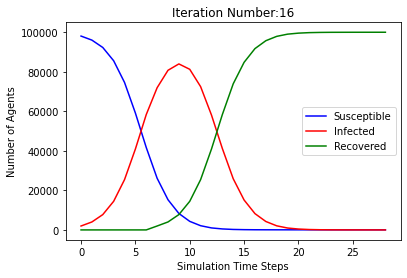

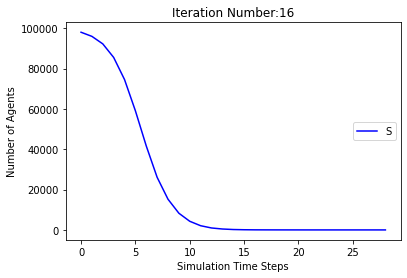

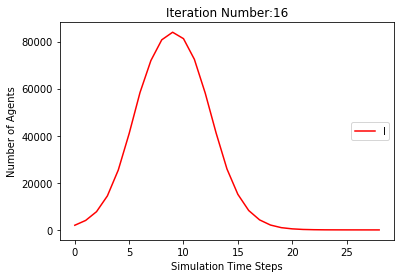

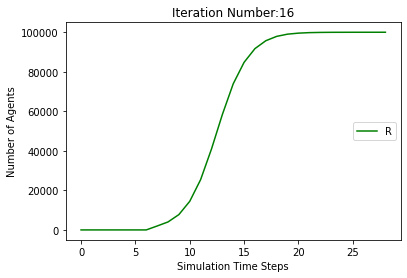

In [ ]:
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

In [ ]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
